In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
train_directory='./train'
test_directory='./test'
val_directory='./valid'

In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [5]:
  # useful for getting number of classes
folders = glob('./train/*')
len(folders)

525

In [6]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [7]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


In [10]:
print(len(training_set))
print(len(test_set))

2645
83


In [11]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=36,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Acer\AppData\Local\Temp\ipykernel_10160\3994103796.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/36


2645/2645 [==============================] - 11773s 4s/step - loss: 6.5042 - accuracy: 0.3159 - val_loss: 3.7228 - val_accuracy: 0.5684
Epoch 2/36
2645/2645 [==============================] - 12308s 5s/step - loss: 4.2304 - accuracy: 0.5473 - val_loss: 3.6955 - val_accuracy: 0.6263
Epoch 3/36
2645/2645 [==============================] - 11352s 4s/step - loss: 3.4730 - accuracy: 0.6344 - val_loss: 3.8229 - val_accuracy: 0.6568
Epoch 4/36
2645/2645 [==============================] - 10052s 4s/step - loss: 3.0148 - accuracy: 0.6883 - val_loss: 3.8785 - val_accuracy: 0.6758
Epoch 5/36
2645/2645 [==============================] - 9659s 4s/step - loss: 2.6100 - accuracy: 0.7278 - val_loss: 3.4112 - val_accuracy: 0.7051
Epoch 6/36
2645/2645 [==============================] - 10905s 4s/step - loss: 2.3511 - accuracy: 0.7571 - val_loss: 3.6108 - val_accuracy: 0.7101
Epoch 7/36
2645/2645 [==============================] - 12630s 5s/step - loss: 2.1140 - accuracy: 0.7797 - val_loss: 

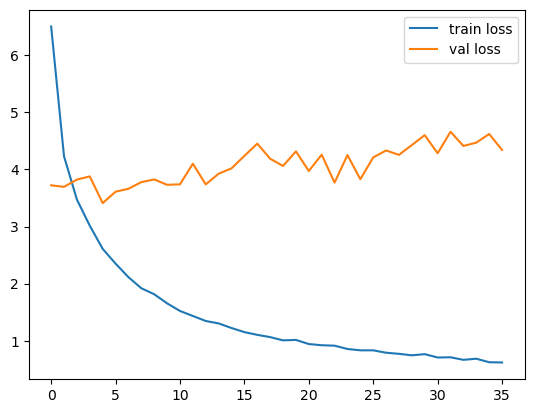

In [12]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

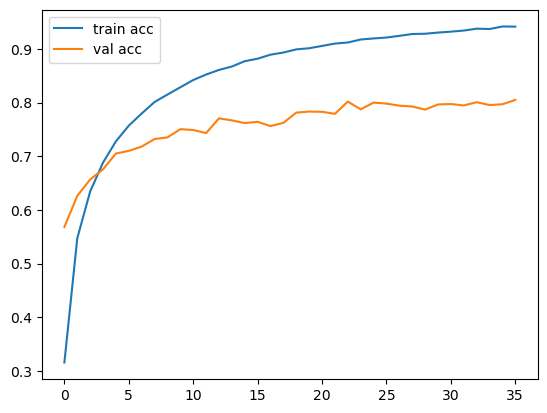

In [13]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [14]:
model.save('Birdy.h5')

c:\Users\Acer\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

model1 = load_model('./Birdy.h5',compile=False)  

In [16]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}

In [17]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

1/1 [==============================] - 0s 323ms/step


'BARN OWL'

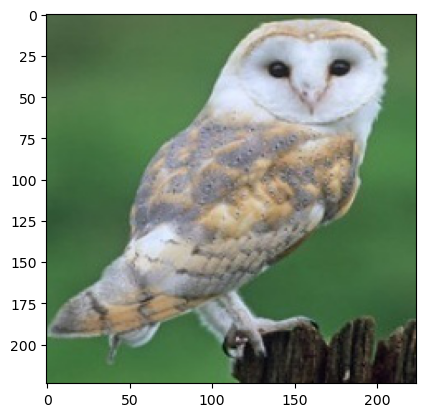

In [18]:
img='./valid/BARN OWL/1.jpg'
pic=load_img('./valid/BARN OWL/1.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

In [19]:
import tensorflow as tf
import keras as k
print(tf.__version__)
print(k.__version__)

2.15.0
2.15.0
